In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

In [2]:
df = pd.read_csv("./capstone/data/laliga2019_2020.csv")
len(df["HomeTeam"].unique())

20

In [3]:
df.shape

(380, 105)

In [4]:

hst = df["HST"]
hc = df["HC"]
fthg = df["FTHG"]

<IPython.core.display.Javascript object>


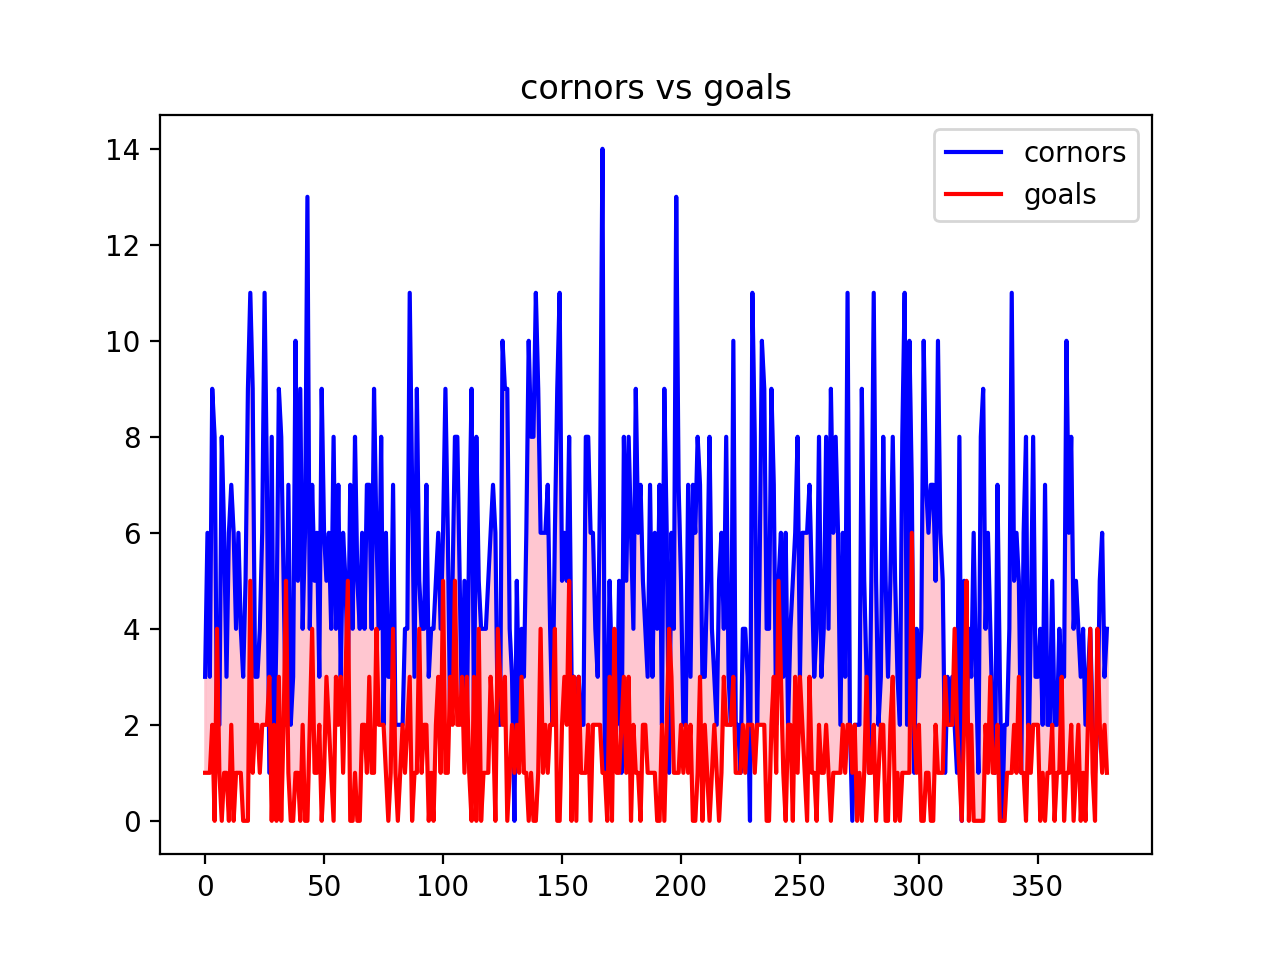

In [5]:
plt.figure()
plt.plot(hc,"-b" ,fthg,"-r")
plt.title("cornors vs goals")
plt.legend(["cornors","goals"])
plt.gca().fill_between(range(len(hc)), hc, fthg, color="pink", alpha=0.9)

<IPython.core.display.Javascript object>


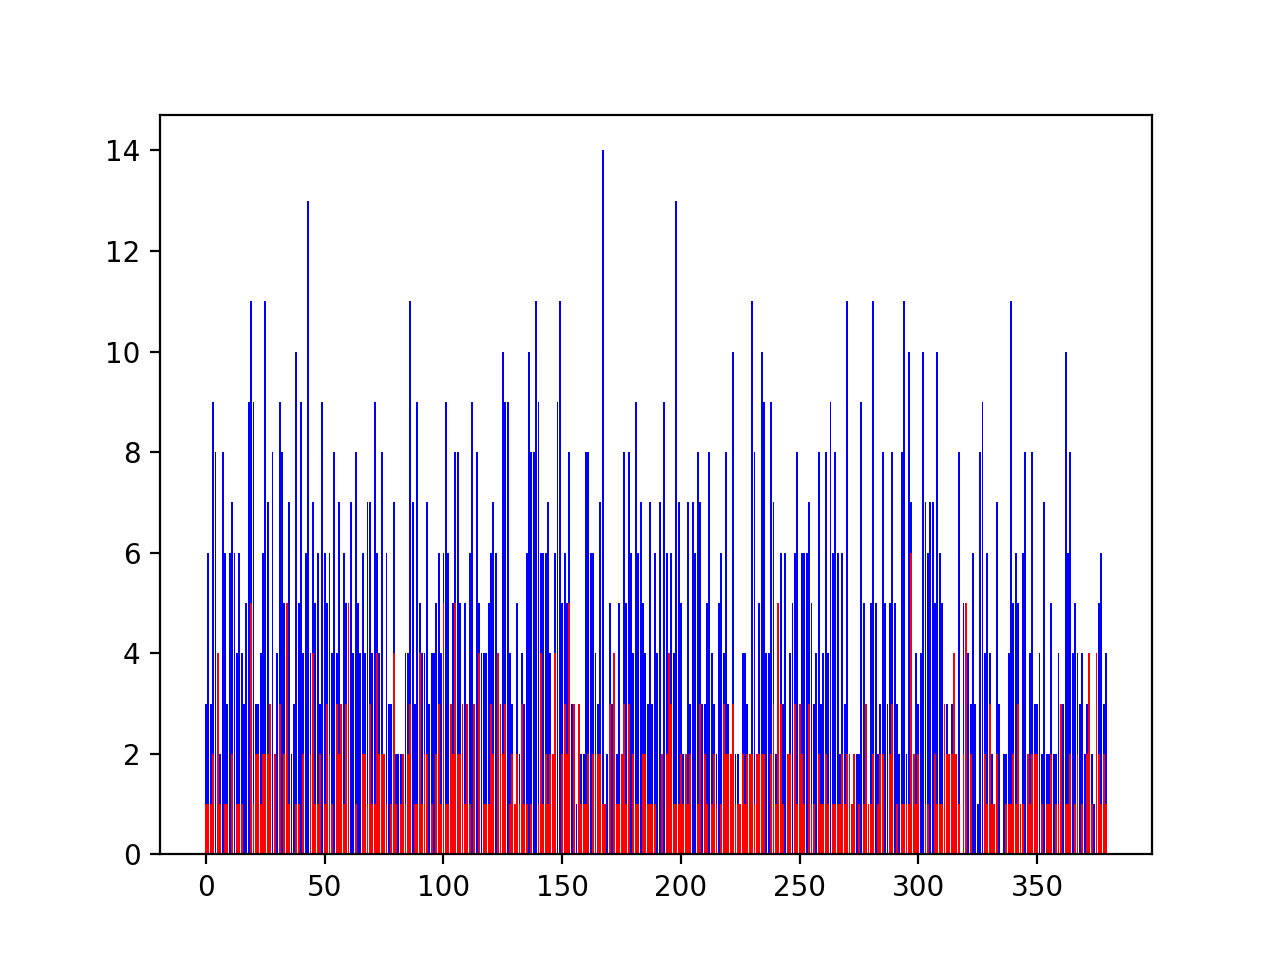

<BarContainer object of 380 artists>

In [6]:
xvals = range(len(hc))
plt.figure()
plt.bar(xvals, hc, color="blue")
plt.bar(xvals, fthg, color="red")

In [7]:
barcelona = df[df["HomeTeam"]=="Barcelona"]
bhst = barcelona["HST"]
bhc = barcelona["HC"]
bfthg = barcelona["FTHG"]

<IPython.core.display.Javascript object>


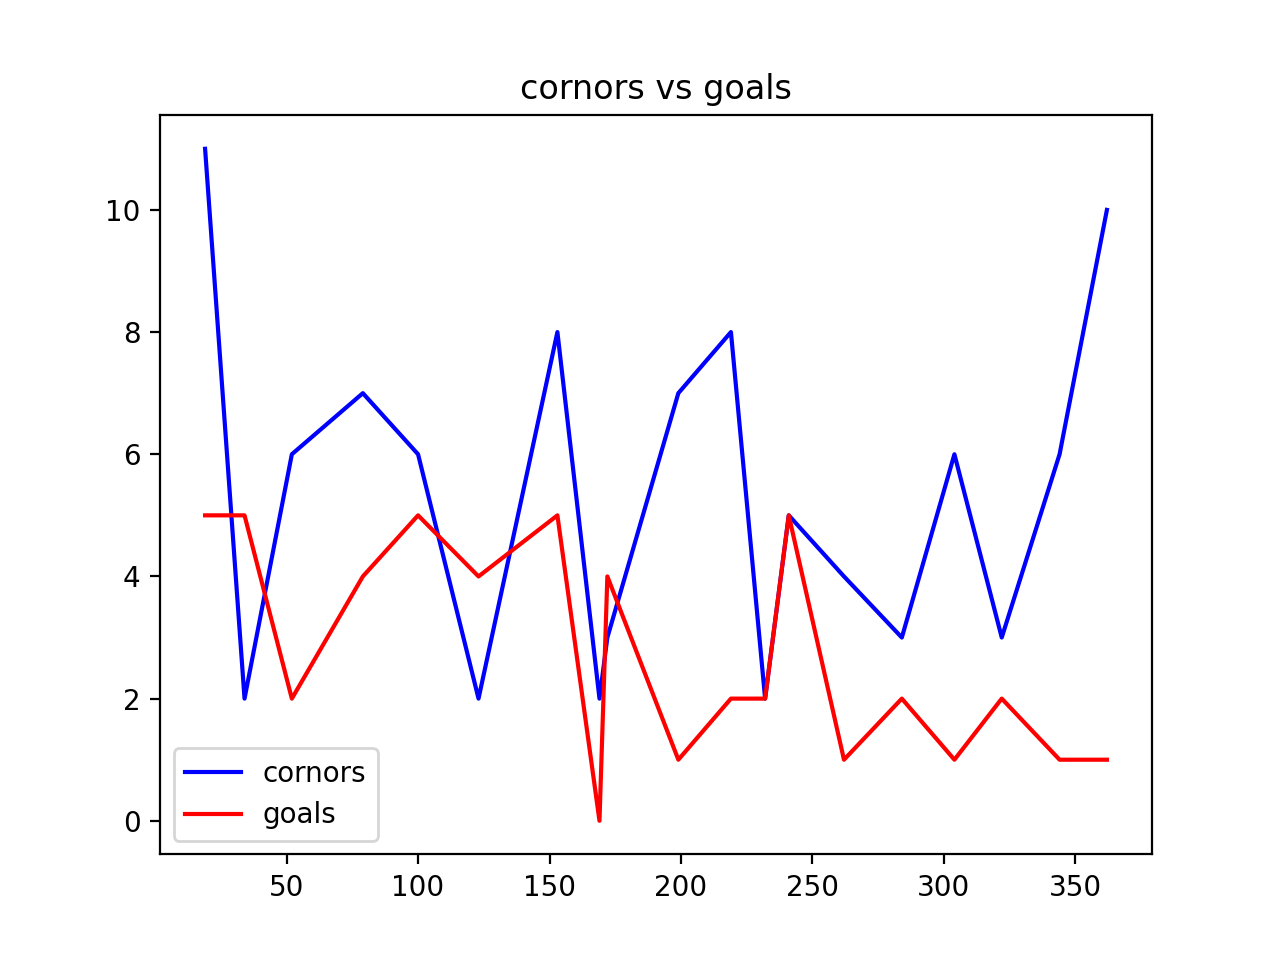

In [8]:
plt.figure()
plt.plot(bhc,"-b" ,bfthg,"-r")
plt.title("cornors vs goals")
plt.legend(["cornors","goals"])


<IPython.core.display.Javascript object>


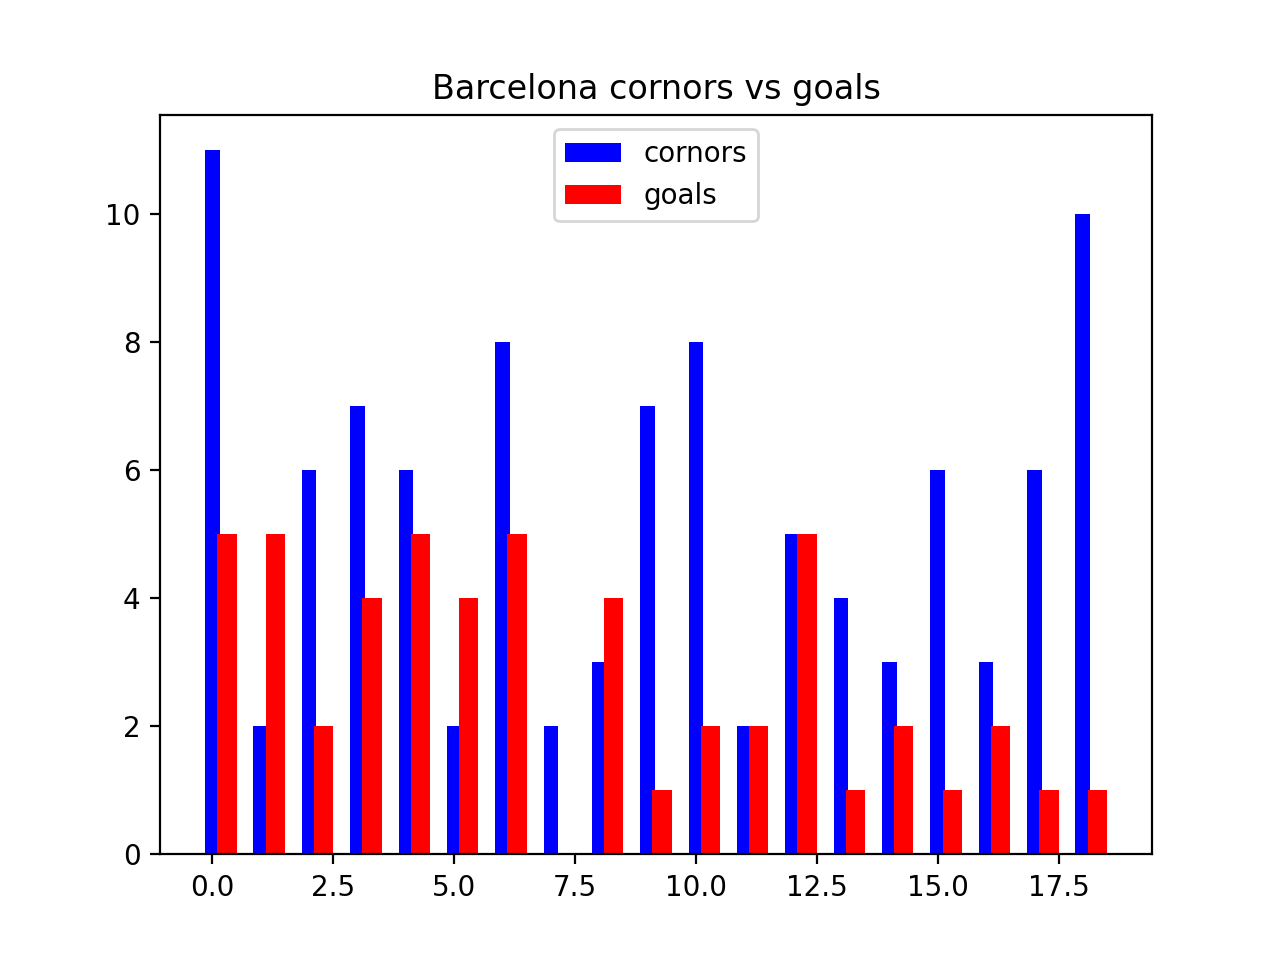

<BarContainer object of 19 artists>

In [9]:
xvals = range(len(bhc))
plt.figure()
plt.bar(xvals, bhc, color="blue", width=0.3)

In [10]:
new_xvals=[]
for item in xvals:
    new_xvals.append(item+0.3)

In [11]:
plt.bar(new_xvals, bfthg, color="red", width=0.4)
plt.title("Barcelona cornors vs goals")
plt.legend(["cornors","goals"])

In [93]:
# reading and processing players
players = pd.read_csv("./data/laliga_players.csv")
team_names = {'Athletic Club':"", 'Atlético de Madrid':"Ath Madrid", 'CD Leganés':"Leganes", 'D. Alavés':"Alaves",
       'FC Barcelona':"Barcelona", 'Getafe CF':"Getafe", 'Girona FC':"", 'Levante UD':"Levante",
       'R. Valladolid CF':"Valladolid", 'Rayo Vallecano':"", 'RC Celta':"Celta", 'RCD Espanyol':"Espanol",
       'Real Betis':"Betis", 'Real Madrid':"Real Madrid", 'Real Sociedad':"Sociedad", 'SD Eibar':"Eibar",
       'SD Huesca':"", 'Sevilla FC':"Sevilla", 'Valencia CF':"Valencia", 'Villarreal CF':"Villarreal"}
players = players.replace(team_names) 
players = players[players["Team"]!=""]
tnames = players["Team"].unique()
# players = players.set_index(["Team","Position"])

In [129]:
# match dataset setting up

matches = pd.read_csv("./data/1920.csv")
team_names=[
    'Barcelona', 'Real Madrid', 'Sociedad', 'Eibar',
    'Levante', 'Sevilla', 'Valladolid', 'Getafe',
    'Villarreal', 'Valencia', 'Espanol', 'Ath Madrid',
    'Betis', 'Celta', 'Alaves',"Leganes"
        ]


def nameedit(item):
    if item in team_names:
        return item
    return ""
matches.HomeTeam = matches["HomeTeam"].apply(nameedit)
matches = matches[matches["HomeTeam"]!=""]
matches

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
1,SP1,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,1,...,2.63,1.00,1.82,1.97,1.85,2.07,2.00,2.20,1.82,2.06
2,SP1,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,0,...,1.82,-0.75,1.94,1.99,1.92,2.00,1.96,2.12,1.89,2.00
4,SP1,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,0,...,1.46,-0.50,1.89,2.04,1.90,2.01,1.95,2.06,1.90,1.99
5,SP1,17/08/2019,20:00,Villarreal,Granada,4,4,D,1,1,...,1.92,-1.00,1.96,1.97,1.96,1.96,1.98,2.12,1.93,1.95
6,SP1,18/08/2019,16:00,Alaves,Levante,1,0,H,0,0,...,1.74,-0.25,2.08,1.85,2.08,1.84,2.09,1.97,2.04,1.85
7,SP1,18/08/2019,18:00,Espanol,Sevilla,0,2,A,0,1,...,1.85,0.25,1.86,2.07,1.85,2.07,1.98,2.11,1.84,2.05
8,SP1,18/08/2019,20:00,Betis,Valladolid,1,2,A,0,0,...,1.83,-0.75,2.02,1.77,2.08,1.84,2.14,1.92,2.08,1.81
9,SP1,18/08/2019,21:00,Ath Madrid,Getafe,1,0,H,1,0,...,1.59,-1.00,2.06,1.87,2.07,1.85,2.07,2.10,1.97,1.91
11,SP1,23/08/2019,21:00,Levante,Villarreal,2,1,H,0,1,...,2.32,0.00,1.91,2.02,1.89,2.02,1.92,2.04,1.89,2.00
13,SP1,24/08/2019,18:00,Real Madrid,Valladolid,1,1,D,0,0,...,3.02,-2.00,2.05,1.75,2.17,1.77,2.17,1.96,2.05,1.82


In [130]:
for team in team_names:
    if team not in tnames:
        print(team)

In [95]:
players.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

In [96]:
players["Position"].unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], dtype=object)

In [97]:

forward = players[players["Position"]=="Forward"]
forward = forward.groupby(["Team"])[["Shots on target","Successful dribbles",'Goals scored','Goals scored per attempt']].agg(np.mean)

midfield = players[players["Position"]=="Midfielder"]
midfield = midfield.groupby(["Team"])[["Assists","Passes","Short passes","Long passes","Through balls"]].agg(np.mean)
midfield

defense = players[players["Position"]=="Defender"]
defense = defense.groupby(["Team"])[["Clearances","Penalties given away","Last man","Interceptions","Tackles","Long passes","Successful tackles","Unssuccessful tackles"]].agg(np.mean)
defense

goalkeeper = players[players["Position"]=="Goalkeeper"]
goalkeeper = goalkeeper.groupby(["Team"])["Long passes"].agg(np.mean)
goalkeeper
defense
forward

,Shots on target,Successful dribbles,Goals scored,Goals scored per attempt
Team,,,,
Alaves,6.833333,11.166667,2.833333,1.666667
Ath Madrid,14.000000,25.857143,4.428571,2.714286
Barcelona,33.800000,49.400000,13.200000,4.400000
Betis,13.333333,10.333333,2.666667,1.666667
Celta,23.333333,20.000000,11.666667,6.000000
Eibar,17.500000,5.750000,6.750000,4.000000
Espanol,12.166667,13.833333,4.000000,2.000000
Getafe,23.333333,19.000000,12.000000,7.666667
Leganes,10.333333,10.166667,3.333333,1.333333


In [131]:
# reading and preprocessing matches data from 09/10 to 19/20 season
matches=[]
for i in range(9,20):
    season = str(i)+str(i+1)
    source = "./data/"+season+".csv"
    match = pd.read_csv(source)
    if "Time" in match.columns:
        match = match.drop("Time", axis=1)
    matches.append(match)

In [134]:
team_names=[
    'Barcelona', 'Real Madrid', 'Sociedad', 'Eibar',
    'Levante', 'Sevilla', 'Valladolid', 'Getafe',
    'Villarreal', 'Valencia', 'Espanol', 'Ath Madrid',
    'Betis', 'Celta', 'Alaves',"Leganes"
        ]


def nameedit(item):
    if item in team_names:
        return item
    return ""

processed_matches = []
for match in matches:
    def nameedit(item):
        if item in team_names:
            return item
        return ""
    match.HomeTeam = match["HomeTeam"].apply(nameedit)
    match.AwayTeam = match["AwayTeam"].apply(nameedit)
    match = match[match["HomeTeam"]!=""]
    match = match[match["AwayTeam"]!=""]
    match = match.rename(columns={"HomeTeam":"Team"})
    match = match.iloc[:,:23]
    processed_matches.append(match)

In [135]:
for i in range(len(matches)):
    print(matches[i].shape,processed_matches[i].shape)

(380, 70) (72, 23)
(380, 70) (90, 23)
(380, 70) (110, 23)
(342, 73) (120, 23)
(380, 67) (156, 23)
(380, 67) (132, 23)
(380, 64) (156, 23)
(380, 64) (156, 23)
(380, 64) (210, 23)
(380, 61) (240, 23)
(380, 104) (240, 23)


In [136]:
#checking if all the columns are same or not.
for i in range(len(matches)-1):
    print(processed_matches[i].columns == processed_matches[i+1].columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True 

In [137]:
for i in range(len(matches)):
    print(processed_matches[i].head())

    Div        Date        Team     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
8   SP1  2009-08-30    Valencia      Sevilla     2     0   H     0     0   D   
11  SP1  2009-09-12     Espanol  Real Madrid     0     3   A     0     1   A   
12  SP1  2009-09-12      Getafe    Barcelona     0     2   A     0     0   D   
17  SP1  2009-09-13  Valladolid     Valencia     2     4   A     1     3   A   
20  SP1  2009-09-19   Barcelona   Ath Madrid     5     2   H     4     1   H   

    ...  AST  HF  AF  HC  AC  HY  AY  HR  AR  B365H  
8   ...    1  20  14   7   0   1   2   0   1   2.25  
11  ...    6  17  17   4   6   2   2   0   0   6.00  
12  ...    9  15  19   2   5   3   0   0   0   6.50  
17  ...    6  10  15   2   3   1   2   0   0   3.40  
20  ...    4   8  17   7   8   1   3   0   0   1.33  

[5 rows x 23 columns]
    Div      Date        Team    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
1   SP1  28/08/10     Levante     Sevilla     1     4   A     1     2   A   
3   SP1  29/08/10 

In [138]:
merge = []
for i in processed_matches:
    x=i.merge(forward, how="left", on="Team" ).rename(columns = {"Team":"HomeTeam","AwayTeam":"Team"}).merge(forward, how = "left", on="Team")
    x=x.rename(columns = {"HomeTeam":"Team","Team":"AwayTeam"}).merge(midfield, how="left", on="Team" ).rename(columns = {"Team":"HomeTeam","AwayTeam":"Team"}).merge(midfield, how = "left", on="Team")
    x=x.rename(columns = {"HomeTeam":"Team","Team":"AwayTeam"}).merge(defense, how="left", on="Team" ).rename(columns = {"Team":"HomeTeam","AwayTeam":"Team"}).merge(defense, how = "left", on="Team")
    x=x.rename(columns = {"HomeTeam":"Team","Team":"AwayTeam"}).merge(goalkeeper, how="left", on="Team" ).rename(columns = {"Team":"HomeTeam","AwayTeam":"Team"}).merge(goalkeeper, how = "left", on="Team")
    x=x.rename(columns= {"Team":"AwayTeam"})
    merge.append(x)

In [139]:
for i in range(len(merge)-1):
    print(merge[i].columns == merge[i+1].columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True 

In [140]:
merge[10].head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Clearances_y,Penalties given away_y,Last man_y,Interceptions_y,Tackles_y,Long passes_y,Successful tackles_y,Unssuccessful tackles_y,Long passes_x,Long passes_y
0,SP1,17/08/2019,Celta,Real Madrid,1,3,A,0,1,A,...,35.181818,0.545455,0.181818,16.545455,4.363636,83.818182,14.181818,7.090909,239.333333,132.333333
1,SP1,17/08/2019,Valencia,Sociedad,1,1,D,0,0,D,...,46.818182,0.181818,0.000000,19.181818,6.454545,77.727273,14.545455,9.454545,295.000000,220.333333
2,SP1,18/08/2019,Alaves,Levante,1,0,H,0,0,D,...,56.500000,0.300000,0.100000,21.700000,11.800000,92.000000,14.700000,7.600000,286.000000,213.666667
3,SP1,18/08/2019,Espanol,Sevilla,0,2,A,0,1,A,...,63.875000,0.250000,0.375000,22.125000,10.875000,98.125000,18.750000,9.375000,312.000000,226.333333
4,SP1,18/08/2019,Betis,Valladolid,1,2,A,0,0,D,...,56.000000,0.500000,0.500000,20.900000,8.400000,94.800000,18.800000,10.800000,215.000000,452.500000


In [143]:
#checking for any inconsistance after the merge operation.
for df in merge:
    print(df.isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
